# Εργαστηριακή Άσκηση 9

California Housing Regression

### Εκφώνηση
Ζητείται να εκπαιδευτεί και να αξιολογηθεί ένα μοντέλο **γραμμικής παλινδρόμησης** για την πρόβλεψη της μέσης τιμής κατοικίας στην California, με κανονικοποίηση (scaling) των δεδομένων.

In [37]:
# Εισαγωγή βιβλιοθηκών
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Φόρτωση δεδομένων - εμφάνιση των διαστάσεων και των πρώτων γραμμών
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

print("Διαστάσεις X:", X.shape)
X.head()

Διαστάσεις X: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
# Διαχωρισμός σε train/test 80%-20%. - εμφάνιση διαστάσεων
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Διαστάσεις X_train:", X_train.shape)
print("Διαστάσεις X_test:", X_test.shape)

Διαστάσεις X_train: (16512, 8)
Διαστάσεις X_test: (4128, 8)


In [40]:
# Κανονικοποίηση δεδομένων με StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Εκπαίδευση γραμμικού μοντέλου
model = LinearRegression()
model.fit(X_train_scaled, y_train);

In [42]:
# Πρόβλεψη και αξιολόγηση (MSE, R^2)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 0.56
R^2 Score: 0.58


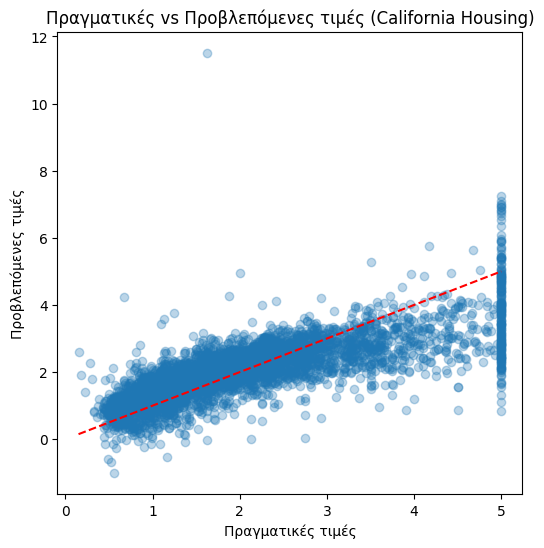

In [43]:
# Οπτικοποίηση αποτελεσμάτων (πραγματικές vs. προβλεπόμενες τιμές)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Πραγματικές τιμές")
plt.ylabel("Προβλεπόμενες τιμές")
plt.title("Πραγματικές vs Προβλεπόμενες τιμές (California Housing)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [ ]:
# Συντελεστές γραμμικού μοντέλου
coefs = pd.Series(model.coef_, index=X.columns).sort_values()
coefs

Latitude     -0.896929
Longitude    -0.869842
AveRooms     -0.294410
AveOccup     -0.040829
Population   -0.002308
HouseAge      0.122546
AveBedrms     0.339259
MedInc        0.854383
dtype: float64

### Ερωτήσεις
1. Ποια είναι η τιμή του **R^2 score** πριν και μετά το scaling;
2. Ποιο είναι το **Mean Squared Error (MSE)** πριν και μετά το scaling;
3. Πως θα βελτιώνατε το μοντέλο; Περιγραψτε 1 μόνο ιδέα.
4. Ποια είναι η καλύτερη τιμή R^2 για το πρόβλημα που μπορείτε να εντοπίσετε στο διαδίκτυο, παραθέστε τη διεύθυνση που την εντοπίσατε.